# Derivatives Pricing 





### Derivatives

- Derivatives are financial instruments that "derive" their performance from the performance (the value and other characteristics) of the underlying asset. 

Example of underlying assets: stocks, bonds, commodities, currencies, interest rates, etc.

- The value of the underlying is a source of risk. 

Derivatives are financial contracts that are similar to insurance in the sense that they provide protection against loss. The buyer of a derivative takes a long position, and the seller holds a short position.


Derivative markets are generally more liquid than their underlyings, and they offer a simpler, more effective and low-cost way to manage risk. For example, investors holding bonds and concerned about interest rate risk can efficiently manage their risk exposures with derivatives (although they could trade stocks and bonds to adjust their level of risk, derivatives makes managing risk easier).

As risk is constantly changes with market changes, effective risk hedging with derivatives require complex mathematical modeling.  

In this notebook I examine the valuation of European options and the relationships between them and the price of the underlying using data science tools. 



### Options 

Options are financial contracts that give option holders the right to either buy (in the case of a call options)  or sell (put options) an (underlying) asset, by or at a later date T (called expiry or maturity) at a price agreed upon K (called exercise price). Option owners have the right to buy/sell, but not the obligation to exercise their right. 

Buying an option requires an up-front payment (called option premium) that represents a fair price of the option.

The value of an option can roughly be calculated as the present value (PV) of the cash flows expected to be received by the holder of the option during the life of the option.  


### European Options

An European option can be exercised only on the expiration. If we denote $S_T$ the price of the underlying at expiration, then the option payoff at time T is calculated as $c_T = max(S_{T}-K, 0)$ (for call) and $p_T= max(K-S_{T},0)$

If the price of the underlying at expiration $ST < K$, investors won't choose to exercise the call option (it makes no sense to pay more when the market value is less). In this circumstances, investors lose only the initial investment cost (option premium). If the price of the underlying $ST> K$ on the expiration date, the option will be exercised, and investors make a gain of $ST -K$.  In the case of a put European option, investors will exercise it only if the price of the underlying is below strike price on the expiration date $ST < K$. (it makes no sense to sell an asset a price for less than its market value)

Remark: It's important to note that an investor sometimes choses to exercise an option and makeing a loss overall. Ex: when taking into account the initial cost of the option, and when not exercising would lead to an overall greater loss than when exercising. 



In [1]:
#imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Expected Payoff for European Options:

S0 = 95 #current price of the underlying asset
K = 100 #exercise price
T = 1 #time to expiry
ST = 108 # price of the underlying asset at expiry

cT = np.maximum(ST - K,0)

pT = np.maximum(K-ST,0)

print (f"The payoff of European call option at the expiration is: {cT}")

print (f"The payoff of European put option at the expiration is: {pT}")


The payoff of European call option at the expiration is: 8
The payoff of European put option at the expiration is: 0


## Option Pricing and Valuation: 

### Lowest bound limit


Central Question to valuation: Finding what an option is worth.

When valuing an option, the only element of uncertainty is the price of the underlying -  more exactly,  whether the price of the underlying is above or below strike price at expiry.  

The following strategy produces equivalent results to the outcome of the call option: If an investor borrows the amount K with an interest rate r that has to be returned at expiry. Then at t=0, (asset) owned S=S0 minus (loan) $K/(1+r)^T$. And at time t=T, upon paying the loan K, the payoff at expiry will be $ST-K$. 

From here we conclude: a call options worth is at least the value of the leveraged strategy i.e., $c0 >= S0 - K/(1+r)^2$. Since an option cannot be zero, the lower bound for a call option value is: $c0 >= max(S0 - K/(1+r)^T, 0)$.


Using a similar argument for put options, we get: $p0 >= max (K/(1+r)^T-S0, 0)$.



### Upper bound for call 

The value of an European call is directly related to the value of the underlying and inverly related to K. 

The value of the underlying forms an upper boundary on what a call is worth (value of call option cannot exceed the value of the underlying): $c0 < S0$



### Upper bound for put 

The value of an European put is directly related K and inverly related to the value of the underlying. 
The exercise price forms an upper bound for the value of an European put i.e., $p0 <K$.



### Option Pricing and Valuation: 


Below is a list of the key kactors affecting the price of an European option:

- Current stock price, S0
- Exercise price, K
- Time to expiry, T
- Volatility of the underlying, $\sigma$
- Risk-free interest rate, r
- Dividends 

It is clear that the value of a call is directly related to the time to expiry i.e., more time for the price of the underlying to rise above K. For put calls, there are less benefits for longer periods than smaller. 

The value of both a call or put is directly related to the volatility of the underlying i.e., volatility increasing means the more option is worth. That is because the payoff of a call at expiry is higher the higher the value of the underlying vary from the mean. For a put option, the lower the price of the underlying at expiry the higher the payoff.


Since an option derives its value from the value of the underlying asset, option valuation can be achieved by constructing a hedge portfolio that consists of a combination of the option and the underlying. For example, since call option and the underlying move together, buying a delta units of the underlying and selling a call can create a hedge investment that earns a risk-free rate. 

The ability to create a hedge portfolion and the principle of no-arbitrage, reduces the option valuation as if the investors are risk neural i.e., modeling the market uncertainty using risk-neutral probabilities abd discounting the expected pay off cash flow using a risk-free rate. 



In [3]:
#Valuation of European options using Monte Carlo method


S0 = 95 #current price of the underlying
K = 100 #exercise price
T = 1 #time to expiry
ST = 108 # price of the underlying at expiry
r = 0.04 # risk-tree interest rate
sigma = 0.18 # volatility of the underlying

n = 8000 # number of MC simulations

#seed 
np.random.seed(123)

# Returns are assumed normally distributed

# Draw samples from a standard normal distribution
z = np.random.standard_normal(n) 

#Black-Scholes-Merton price formula for the underlying at expiry
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * z)

# Option payoff at expiry
CT = np.maximum(ST - K, 0) 

#Option present value using

C0 = np.exp(-r * T) * np.sum(cT) / n

print (f"Value of the European Call Option : {C0}")


Value of the European Call Option : 0.0009607894391523232


### Log-returns distribution

In [7]:
# Calculating and plotting the log-returns for apple stock

apple['log_returns'] = np.log(apple['Close']/apple['Close'].shift(1))

Text(0, 0.5, 'frequency of log returns')

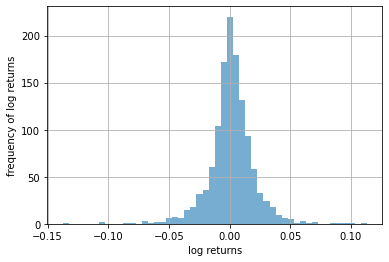

In [8]:
apple['log_returns'].hist(bins=50, alpha=0.6)
plt.xlabel('log returns')
plt.ylabel('frequency of log returns')


###  SUMMARY

The Black-Scholes model makes certain assumptions. 

- Lognormal distribution is the one of the assumptions used in the Black Scholes model of option pricing. 

If prices are assumed to be lognormal distributed, then log of prices follow a normal distribution.(OK)
 
- Stock prices are assumed to be continuously compounded since they respond almost instantly to changes in the demand & supply. 

Price of the stock being continuously compounded can be added across time. This approximation (and BS model assumption) is a desirable mathematical property and not necessarily the reality. (NOT OK)


Volatility is a statistical measure of the dispersion of returns that represents how large stock prices vary around the mean price. Volatility measures the degree of variation of a stock price over time. It is used to characterize risk (uncertainty) of a stock price (risk refers to the probability distribution of returns)


- BS models assumes volatility is constant and known in advance. 

That assumption is often violated; volatility is neither constant nor known in advance. (NOT OK)

- The assumption that risk-free interest rate is constant for all maturities (NOT OK)

Other assumptions are: no dividends, no transaction costs, no taxes 




